In [ ]:
from base import BasePlotter, np, plt
from threeD import Solver3D
# Apply rcParams configuration
BasePlotter.configure_rc_params()

# Export figures to Folder
figures_path = "../Figures/FluxMap3D/"

# Generalising Exponential Concentrations

Concentration profile described by an exponential with varying slope.

$$c_{exp}(r; \lambda) = \frac{1}{4 \pi \lambda \, r^{2}} \mathrm{e}
^{- \frac{r - R_D}{\lambda}}, \quad \lambda>0
$$

In [2]:
def exp_generator(lamb, R_dtm):
    'Define the inner exp function that takes r as parameter'
    def c_exp(r):
        A = 1 / (4 * np.pi * lamb * r**2)
        return A * np.exp( (R_dtm - r)/lamb )
    return c_exp

def compute_flux_profile_exp(syst_params, lamb_values):
    'Computes the flux profile for a range of exponential concentration profiles.'
    R_dtm = syst_params['R_dtm']

    n_lamb = len(lamb_values)
    # Initialize the arrays to store the results
    c_dist_values = np.zeros(n_lamb)
    flux_profile = np.zeros(n_lamb)
    
    # Create the figure for the bacteria distribution and the flux
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    cmap = plt.get_cmap('viridis_r')
    
    for i, lamb in enumerate(lamb_values):
        c_func = exp_generator(lamb, R_dtm)
        diffusion_system = Solver3D(syst_params, c_func)
        diffusion_system.ode.solve()
        
        # Store the results
        c_dist_values[i] = diffusion_system.c[0]
        flux_profile[i] = diffusion_system.ode.abs_flux[0]
        
        colour = cmap(i / n_lamb)

        # Plot the bacteria distribution
        if (i+1) % 5 == 0:
            ax1.plot(
                diffusion_system.r, diffusion_system.c,
                color=colour, label= rf'$\lambda$ = {lamb:.2f}'
                )
        else:
            ax1.plot(diffusion_system.r, diffusion_system.c, color=colour)

        # Plot the flux
        ax2.scatter(lamb, flux_profile[i], color=colour)
    
    configure_axes(ax1, 'r', '$c(r;\\lambda)$', 'Bacterial Concentrations')
    # ax1.set_yscale('log')
    ax1.legend(loc='best', fontsize='small')
    configure_axes(
        ax2, 'Characteristic length $λ$', '$|\\Phi(r=R_dtm)|$',
        'Diatom Flux under Varying\nBacterial Exponential Distributions'
        )

    plt.show()

    return lamb_values, c_dist_values, flux_profile

def configure_axes(ax, xlabel, ylabel, title):
    'Configures the axes of the plot.'
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)

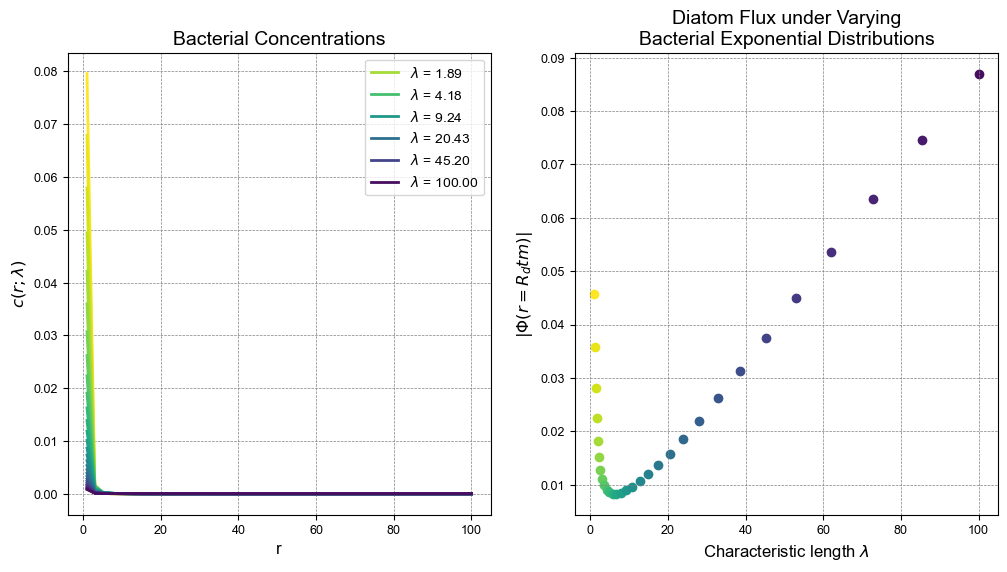

In [3]:
syst_params = {
'R_dtm' : 1.0, 'R_inf' : 100,
'Tc': 1e-3,
'nr': 50,
}

# Generate the exponential concentration profiles
lamb_values = np.logspace(0, 2, num=30)

lamb_values, c_dist_values, flux_profile = compute_flux_profile_exp(syst_params, lamb_values)